In [1]:
%load_ext autoreload
%autoreload 2


import mahotas as mh
import numpy as np
import os
import time

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import mlproof as mlp

In [2]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder1')

Loaded /home/d/patches//cylinder1/ in 0.30172586441 seconds.


In [5]:
thousand_images = X_test['image'][0:1000]

In [6]:
thousand_prob = X_test['prob'][0:1000]

In [7]:
thousand_merged_array = X_test['merged_array'][0:1000]

In [8]:
thousand_border = X_test['border_overlap'][0:1000]

In [9]:
thousand_targets = y_test[0:1000]

In [17]:
thousand_images[123].max()

0.84313726

In [18]:
np.savez('/tmp/james.npz', image=thousand_images, prob=thousand_prob, binary=thousand_merged_array, border=thousand_border, target=thousand_targets)

In [30]:
import random
fixes = []
for f in range(30000):
    
    if random.random() < .2:
        fixes.append('Bad')
    else:
        fixes.append('Good')

In [20]:
len(fixes)

30000

In [21]:
from collections import Counter
good_fixes_per_minute = []
bad_fixes_per_minute = []
good_encoded_fixes = []
bad_encoded_fixes = []
for f in range(len(fixes)):
    if fixes[f] == 'Good':
        good_encoded_fixes.append(1)
        bad_encoded_fixes.append(-1)
    elif fixes[f] == 'Bad':
        good_encoded_fixes.append(-1)
        bad_encoded_fixes.append(1)
    
for f in range(0,len(fixes),12):
    counts = Counter(fixes[f:f+12])
    good_counts = counts['Good']
    bad_counts = counts['Bad']
    good_fixes_per_minute.append(good_counts)
    bad_fixes_per_minute.append(bad_counts)

In [55]:
counts = Counter(fixes)
P = counts['Good']
N = counts['Bad']

In [27]:
P

5998

In [28]:
N

24002

In [31]:
fixes[0:10]

['Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good']

In [36]:
10000./N

0.41663194733772185

In [56]:
counts = Counter(fixes)
P = counts['Good']
N = counts['Bad']
TP_P = []
TN_N = []
for i,f in enumerate(fixes):
    counts_ = Counter(fixes[0:i+1])
    TP_P.append(float(counts_['Good'])/P)
    TN_N.append(float(counts_['Bad'])/N)    
fig, ax = plt.subplots(figsize=(22,22))
ax.plot(TP_P, TN_N)    

In [54]:
Counter(fixes[0:25000+1])

Counter({'Bad': 4993, 'Good': 20008})

In [39]:
fixes[-1:0]

[]

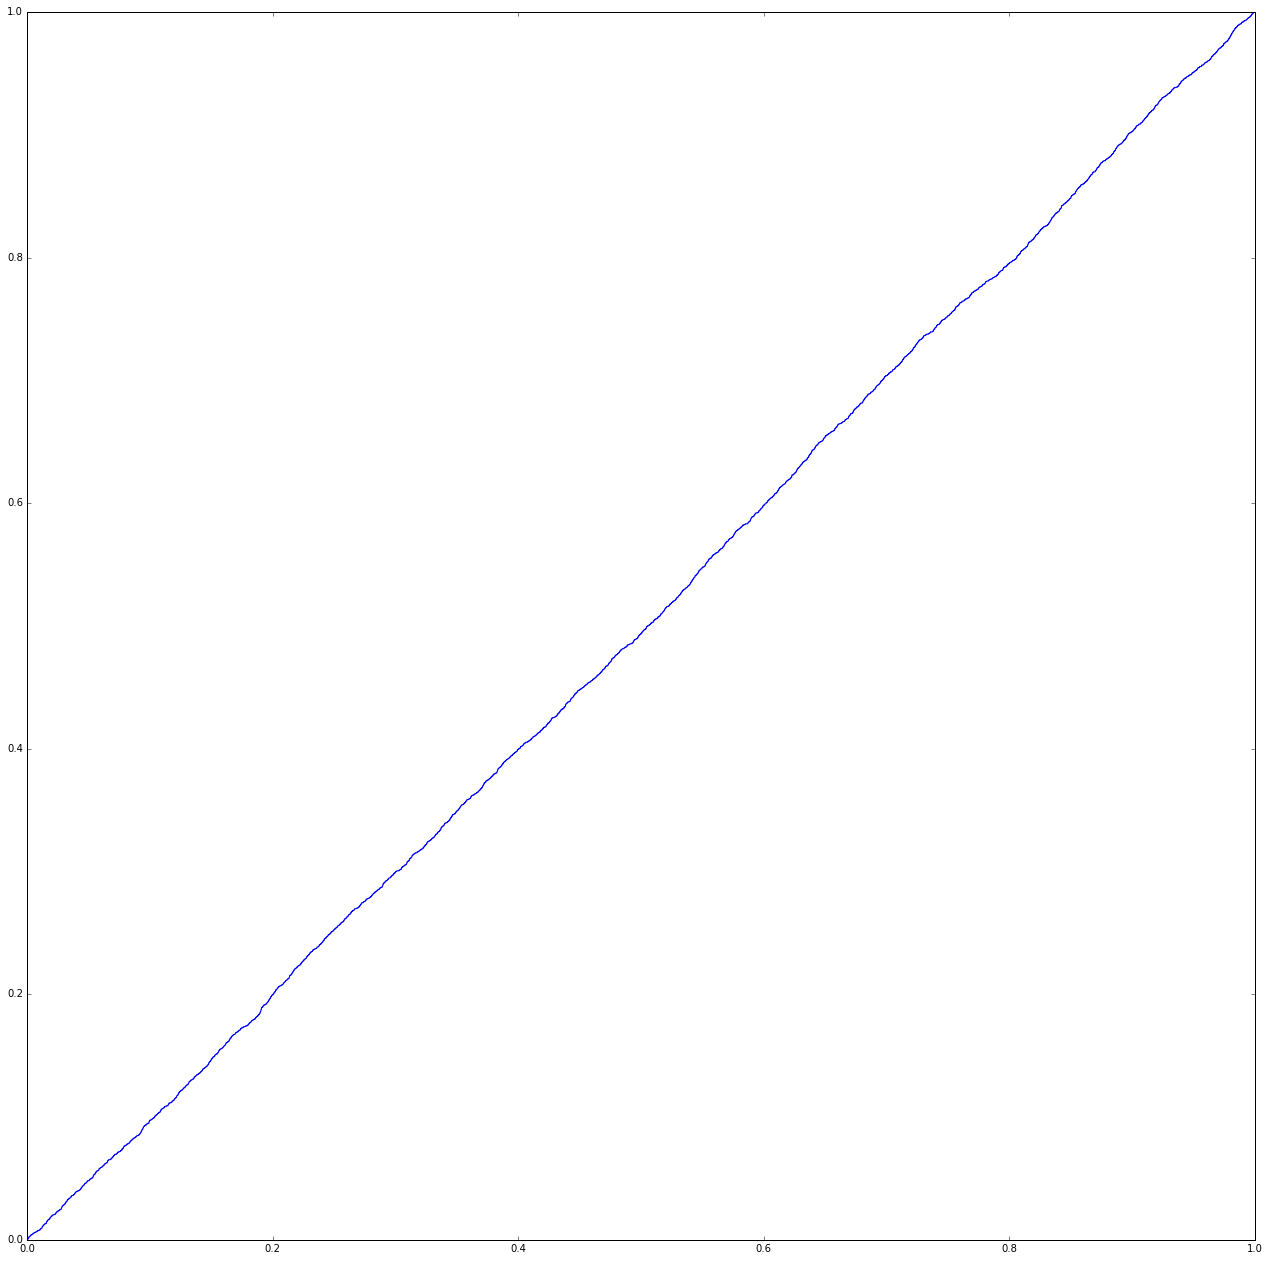

In [45]:
fixes

['Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',